In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings


In [29]:

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

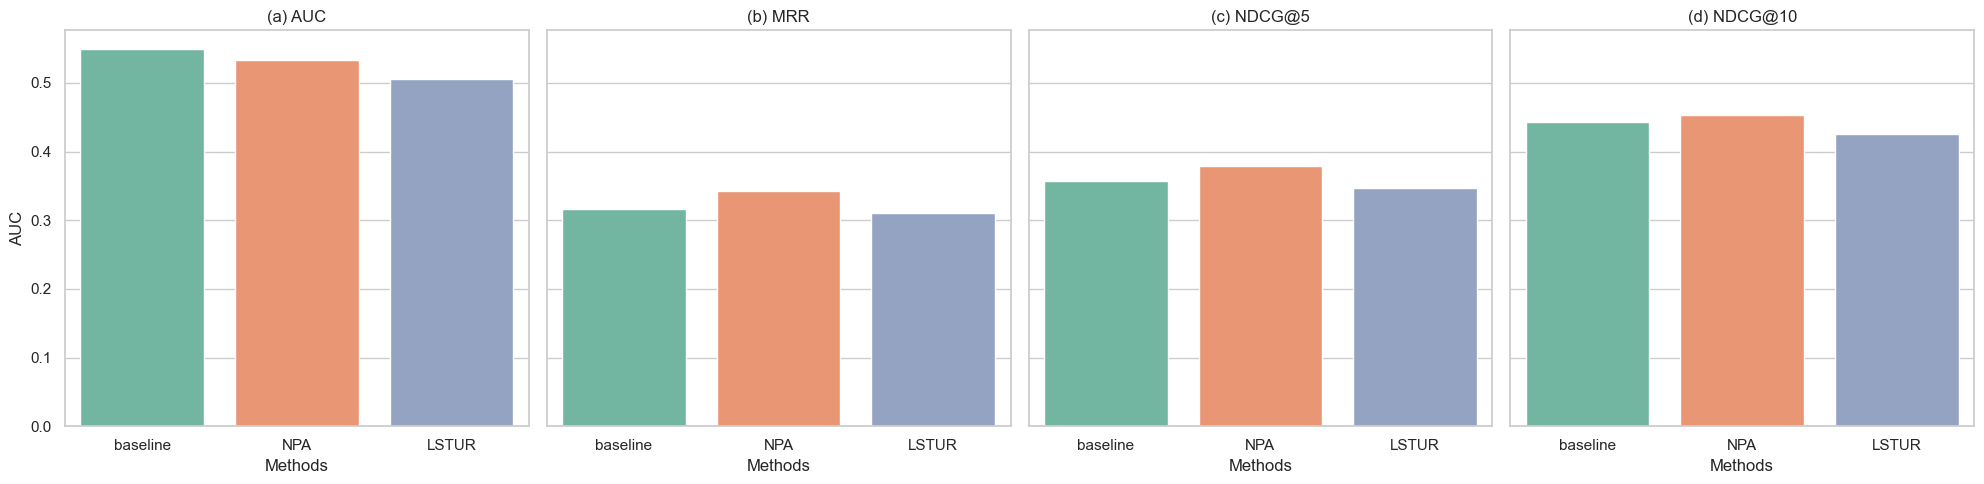

In [30]:
# Sample data
data = {
    'Methods': ['baseline', 'NPA', 'LSTUR'],
    'AUC': [0.549, 0.533, 0.506],
    'MRR': [0.317, 0.342, 0.311],
    'NDCG@5': [0.357, 0.379, 0.347],
    'NDCG@10': [0.443, 0.453, 0.425],
}

df = pd.DataFrame(data)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Initialize the matplotlib figure
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Define colors for the different methods
palette = sns.color_palette("Set2")

# Plot each metric as a separate subplot
metrics = ['AUC', 'MRR', 'NDCG@5', 'NDCG@10']
titles = ['(a) AUC', '(b) MRR', '(c) NDCG@5', '(d) NDCG@10']

for ax, metric, title in zip(axes, metrics, titles):
    sns.barplot(x='Methods', y=metric, data=df, ax=ax, palette=palette)
    ax.set_title(title)

# Adjust the layout
plt.tight_layout()

plt.show()

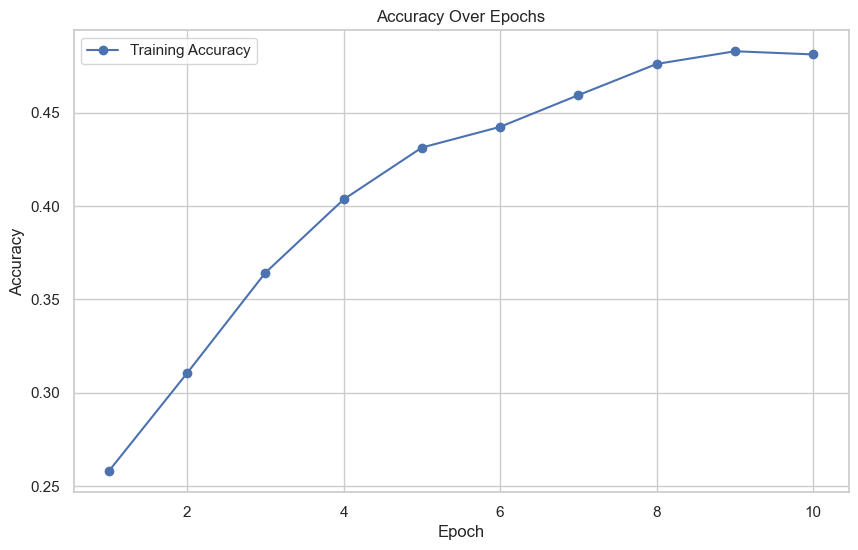

In [7]:
# Sample data for accuracy over epochs
accuracy_data = {
    'epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'accuracy': [0.2579, 0.3104, 0.3642, 0.4035, 0.4313, 0.4424, 0.4594, 0.4761, 0.4829, 0.4812],
}

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(accuracy_data['epoch'], accuracy_data['accuracy'], label='Training Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)

plt.show()


In [8]:
# Sample data for loss over epochs
loss_data = {
    'epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'loss': [1.6091, 1.5819, 1.5200, 1.4432, 1.3952, 1.3650, 1.3309, 1.3105, 1.2930, 1.2843],
}

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(loss_data['epoch'], loss_data['loss'], label='Training Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True)

plt.show()

In [53]:
# Load the data
train_behaviors = pd.read_parquet("../data/ebnerd_small/train/behaviors.parquet")
validation_behaviors = pd.read_parquet("../data/ebnerd_small/validation/behaviors.parquet")
articles = pd.read_parquet("../data/ebnerd_small/articles.parquet")


In [54]:
validation_articles.head()

article_id                             title  \
0     3001353      Natascha var ikke den første   
1     3003065         Kun Star Wars tjente mere   
2     3012771  Morten Bruun fyret i SønderjyskE   
3     3023463         Luderne flytter på landet   
4     3032577    Cybersex: Hvornår er man utro?   

                                            subtitle  last_modified_time  \
0  Politiet frygter nu, at Nataschas bortfører ha... 2023-06-29 06:20:33   
1  Biografgængerne strømmer ind for at se 'Da Vin... 2023-06-29 06:20:35   
2  FODBOLD: Morten Bruun fyret med øjeblikkelig v... 2023-06-29 06:20:39   
3  I landets tyndest befolkede områder skyder bor... 2023-06-29 06:20:43   
4  En flirtende sms til den flotte fyr i regnskab... 2023-06-29 06:20:46   

   premium                                               body  \
0    False  Sagen om den østriske Natascha og hendes bortf...   
1    False  Vatikanet har opfordret til at boykotte filmen...   
2    False  Kemien mellem spillerne i Superligaklubben Søn...   
3    False  Det frække erhverv rykker på landet. I den tyn...   
4    False  De fleste af os mener, at et tungekys er utros...   

       published_time  image_ids     article_type  \
0 2006-08-31 08:06:45  [3150850]  article_default   
1 2006-05-21 16:57:00  [3006712]  article_default   
2 2006-05-01 14:28:40  [3177953]  article_default   
3 2007-03-24 08:27:59  [3184029]  article_default   
4 2007-01-18 10:30:37  [3030463]  article_default   

                                                 url  ... entity_groups  \
0   https://ekstrabladet.dk/krimi/article3001353.ece  ...            []   
1  https://ekstrabladet.dk/underholdning/filmogtv...  ...            []   
2  https://ekstrabladet.dk/sport/fodbold/dansk_fo...  ...            []   
3  https://ekstrabladet.dk/nyheder/samfund/articl...  ...            []   
4  https://ekstrabladet.dk/sex_og_samliv/article3...  ...            []   

                                              topics category  subcategory  \
0          [Kriminalitet, Personfarlig kriminalitet]      140           []   
1               [Underholdning, Film og tv, Økonomi]      414   [433, 434]   
2  [Erhverv, Kendt, Sport, Fodbold, Ansættelsesfo...      142   [196, 199]   
3                                 [Livsstil, Erotik]      118        [133]   
4                            [Livsstil, Partnerskab]      565           []   

    category_str total_inviews  total_pageviews  total_read_time  \
0          krimi           NaN              NaN              NaN   
1  underholdning           NaN              NaN              NaN   
2          sport           NaN              NaN              NaN   
3        nyheder           NaN              NaN              NaN   
4  sex_og_samliv           NaN              NaN              NaN   

   sentiment_score  sentiment_label  
0           0.9955         Negative  
1           0.8460         Positive  
2           0.8241         Negative  
3           0.7053          Neutral  
4           0.9307          Neutral  

[5 rows x 21 columns]

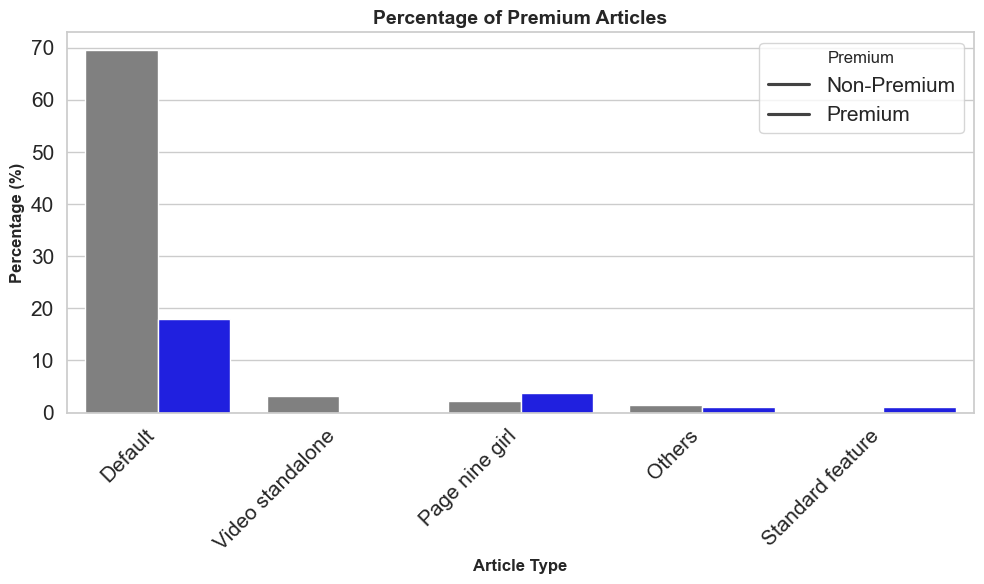

In [108]:
articles = articles[['premium', 'article_type']]
# Remove "article" from article_type and replace "_" with " "
articles['article_type'] = articles['article_type'].str.replace('article', '').str.replace('_', ' ').str.strip().str.capitalize()

# Calculate percentages by premium status and article type
percentages = articles.groupby(['article_type', 'premium']).size().div(len(articles)).mul(100).reset_index()
percentages.rename(columns={0: 'percentage'}, inplace=True)

# Define threshold for filtering
threshold = 1

# Filter and aggregate into "Others"
filtered_percentages = percentages.copy()
filtered_percentages.loc[filtered_percentages['percentage'] < threshold, 'article_type'] = 'Others'
filtered_percentages = filtered_percentages.groupby(['article_type', 'premium'])['percentage'].sum().reset_index()

# Sort bars in descending order based on non-premium articles
filtered_percentages = filtered_percentages.sort_values(by=['premium', 'percentage'], ascending=[True, False])

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_percentages, x='article_type', y='percentage', hue='premium', palette={True: 'blue', False: 'grey'})

# Customize the plot
plt.xlabel('Article Type', fontsize=12, fontweight='bold')  # Bold and larger font
plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold')  # Bold and larger font
plt.title(f'Percentage of Premium Articles', fontsize=14, fontweight='bold')  # Bold and larger font
plt.legend(title='Premium', loc='upper right', labels=['Non-Premium', 'Premium'], fontsize=15)  # Larger font for legend
plt.xticks(rotation=45, ha='right', fontsize=15)  # Rotate and align x-axis labels
plt.yticks(fontsize=15)  # Larger font for y-axis ticks

# Show the plot
plt.tight_layout()
plt.show()

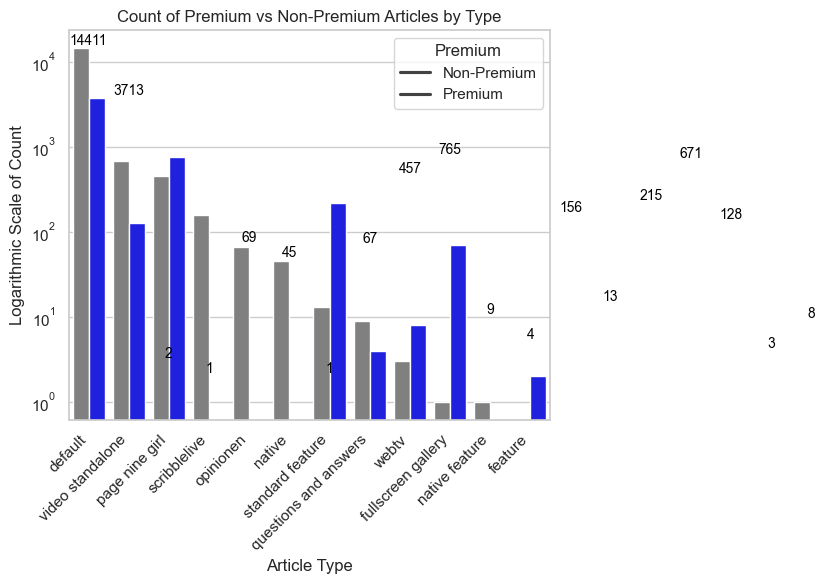

In [88]:
articles = articles[['premium', 'article_type']]
# Remove "article" from article_type
articles['article_type'] = articles['article_type'].str.replace('article', '').str.strip()
articles['article_type'] = articles['article_type'].str.replace('_', ' ')


# Calculate counts by premium status and article type
counts = articles.groupby(['article_type', 'premium']).size().reset_index(name='count')

# Sort bars in descending order based on non-premium articles
counts = counts.sort_values(by=['premium', 'count'], ascending=[True, False])

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='article_type', y='count', hue='premium', palette={True: 'blue', False: 'grey'})

# Display number of articles above each bar
for index, row in counts.iterrows():
    plt.text(index, row['count'] + 1, f"{int(row['count'])}", ha='center', va="bottom", color='black', fontsize=10)

# Customize the plot
plt.xlabel('Article Type')
plt.ylabel('Logarithmic Scale of Count')
plt.yscale('log')  # Set logarithmic scale for y-axis
plt.title('Count of Premium vs Non-Premium Articles by Type')
plt.legend(title='Premium', loc='upper right', labels=['Non-Premium', 'Premium'])
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

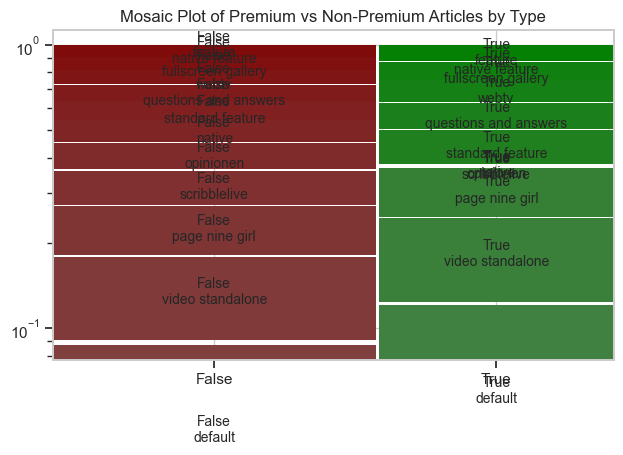

In [92]:
from statsmodels.graphics.mosaicplot import mosaic
articles = articles[['premium', 'article_type']]
# Remove "article" from article_type
articles['article_type'] = articles['article_type'].str.replace('article', '').str.strip()
articles['article_type'] = articles['article_type'].str.replace('_', ' ')

# Remove "article" from article_type and replace "_" with " "
articles['article_type'] = articles['article_type'].str.replace('article', '').str.replace('_', ' ').str.strip()

# Calculate counts by premium status and article type
counts = articles.groupby(['article_type', 'premium']).size().reset_index(name='count')

# Sort bars in descending order based on non-premium articles
counts = counts.sort_values(by=['premium', 'count'], ascending=[True, False])

# Create the mosaic plot
plt.figure(figsize=(10, 6))
mosaic(counts, ['premium', 'article_type'], title='Mosaic Plot of Premium vs Non-Premium Articles by Type')
plt.yscale('log')  # Set logarithmic scale for y-axis
plt.ylabel('Logarithmic Scale of Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
# train_behaviors.columns
premium_counts = validation_articles['premium'].value_counts()
sns.barplot(x=premium_counts.index, y=premium_counts.values, palette='viridis')
plt.xlabel('Premium')
plt.ylabel('Count')
plt.title('Count of Premium True/False')
plt.show()

In [49]:
validation_articles['article_type'].unique()

array(['article_default', 'article_page_nine_girl',
       'article_questions_and_answers', 'article_native',
       'article_opinionen', 'article_scribblelive',
       'article_fullscreen_gallery', 'article_feature',
       'article_standard_feature', 'article_native_feature',
       'article_video_standalone', 'article_webtv'], dtype=object)

In [51]:
article_type_counts = validation_articles['article_type'].value_counts()
article_type_counts

article_type
article_default                  18124
article_page_nine_girl            1222
article_video_standalone           799
article_standard_feature           228
article_scribblelive               156
article_fullscreen_gallery          70
article_opinionen                   67
article_native                      45
article_questions_and_answers       13
article_webtv                       11
article_feature                      2
article_native_feature               1
Name: count, dtype: int64

In [47]:
article_type_counts = validation_articles['article_type'].value_counts()

# Plotting using seaborn
sns.barplot(x=article_type_counts.index, y=article_type_counts.values, palette='viridis')
plt.xlabel('Article Type')
plt.ylabel('Count')
plt.title('Count of Each Article Type')
plt.show()

<Axes: >

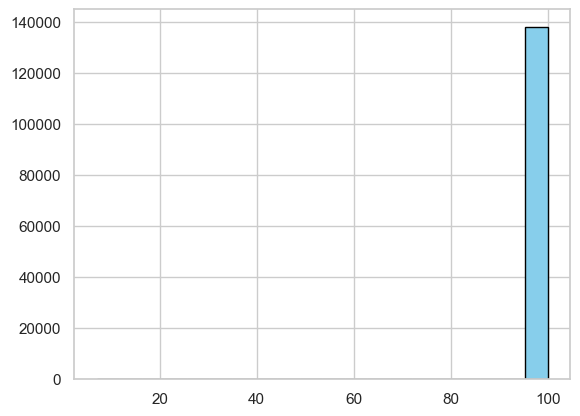

In [41]:
pd.concat([train_behaviors["scroll_percentage"], validation_behaviors["scroll_percentage"]]).dropna().hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.0)

In [35]:
train_behaviors.describe()

impression_id    article_id             impression_time      read_time  \
count   2.328870e+05  7.042100e+04                      232887  232887.000000   
mean    2.882795e+08  9.765423e+06  2023-05-21 16:43:32.126653      43.901806   
min     1.494740e+05  3.198681e+06         2023-05-18 07:00:01       0.000000   
25%     1.420387e+08  9.772032e+06         2023-05-19 18:51:21      11.000000   
50%     2.903336e+08  9.774297e+06         2023-05-21 16:46:53      21.000000   
75%     4.331661e+08  9.776882e+06  2023-05-23 10:46:52.500000      45.000000   
max     5.801007e+08  9.780271e+06         2023-05-25 06:59:58    1799.000000   
std     1.683194e+08  1.296827e+05                         NaN      90.299965   

       scroll_percentage    device_type       user_id        gender  \
count       69098.000000  232887.000000  2.328870e+05  16219.000000   
mean           99.566208       1.685521  1.313502e+06      0.107590   
min             7.000000       1.000000  1.006800e+04      0.000000   
25%           100.000000       1.000000  6.866610e+05      0.000000   
50%           100.000000       2.000000  1.328699e+06      0.000000   
75%           100.000000       2.000000  1.954176e+06      0.000000   
max           100.000000       3.000000  2.590637e+06      1.000000   
std             4.944662       0.519545  7.370205e+05      0.309871   

          postcode          age    session_id  next_read_time  \
count  4673.000000  6341.000000  2.328870e+05   226669.000000   
mean      1.438048    55.013405  9.891061e+05       68.649857   
min       0.000000     0.000000  4.060000e+02        0.000000   
25%       0.000000    50.000000  5.002430e+05        7.000000   
50%       1.000000    60.000000  9.911210e+05       21.000000   
75%       3.000000    60.000000  1.477665e+06       62.000000   
max       4.000000    90.000000  2.030118e+06     1799.000000   
std       1.436164    13.891898  5.682560e+05      172.633560   

       next_scroll_percentage  
count           206617.000000  
mean                69.112617  
min                  0.000000  
25%                 36.000000  
50%                 80.000000  
75%                100.000000  
max                100.000000  
std                 32.253510

In [109]:
# Check for missing values in specified columns
articles_cols = ['total_inviews', 'total_pageviews', 'total_read_time']
behaviors_cols = ['gender', 'postcode', 'age']

# Collect missing values information
missing_values_articles = validation_articles[articles_cols].isnull().sum()
total_values_articles = validation_articles[articles_cols].shape[0]
missing_values_behaviors = validation_behaviors[behaviors_cols].isnull().sum()
total_values_behaviors = validation_behaviors[behaviors_cols].shape[0]

# Prepare data for plotting
articles_data = pd.DataFrame({
    'missing': missing_values_articles,
    'present': total_values_articles - missing_values_articles
}, index=articles_cols)

behaviors_data = pd.DataFrame({
    'missing': missing_values_behaviors,
    'present': total_values_behaviors - missing_values_behaviors
}, index=behaviors_cols)




In [113]:
articles_data

missing  present
total_inviews      10770     9968
total_pageviews    10882     9856
total_read_time    10882     9856

In [118]:


# Plotting missing values for behaviors
fig, ax = plt.subplots(figsize=(10, 6))
articles_data.plot(kind='bar', stacked=True, color=['red', 'blue'], ax=ax)
plt.title('Missing Values in Articles', fontsize=16, fontweight='bold')  # Bold title with larger font size
plt.xlabel('Attributes', fontsize=15, fontweight='bold')  # Bold x-label with font size 15
plt.ylabel('Number of Values', fontsize=15, fontweight='bold')  # Bold y-label with font size 15
plt.xticks(rotation=45, fontsize=15)  # Rotate x-axis labels by 45 degrees with font size 15

# Capitalize the first letter of each category
articles_data.index = articles_data.index.str.replace('Total', '')
articles_data.index = articles_data.index.str.replace('_', ' ').str.capitalize()
labels = [label.capitalize() for label in articles_data.index]
ax.set_xticklabels(labels)

plt.legend(['Missing', 'Present'], fontsize=12)  # Legend with font size 12

plt.tight_layout()
plt.show()

In [115]:
articles_data.index

Index(['total_inviews', 'total_pageviews', 'total_read_time'], dtype='object')

In [100]:
# Plotting missing values for behaviors
fig, ax = plt.subplots(figsize=(10, 6))
behaviors_data.plot(kind='bar', stacked=True, color=['red', 'blue'], ax=ax)
plt.title('Missing Values in Behaviors', fontsize=16, fontweight='bold')  # Bold title with larger font size
plt.xlabel('Attributes', fontsize=15, fontweight='bold')  # Bold x-label with font size 15
plt.ylabel('Number of Values', fontsize=15, fontweight='bold')  # Bold y-label with font size 15
plt.xticks(rotation=45, fontsize=15)  # Rotate x-axis labels by 45 degrees with font size 15

# Capitalize the first letter of each category
labels = [label.capitalize() for label in behaviors_data.index]
ax.set_xticklabels(labels)

plt.legend(['Missing', 'Present'], fontsize=12)  # Legend with font size 12

plt.tight_layout()
plt.show()

In [99]:
behaviors_data.head()

missing  present
gender     228336    16311
postcode   240139     4508
age        238467     6180

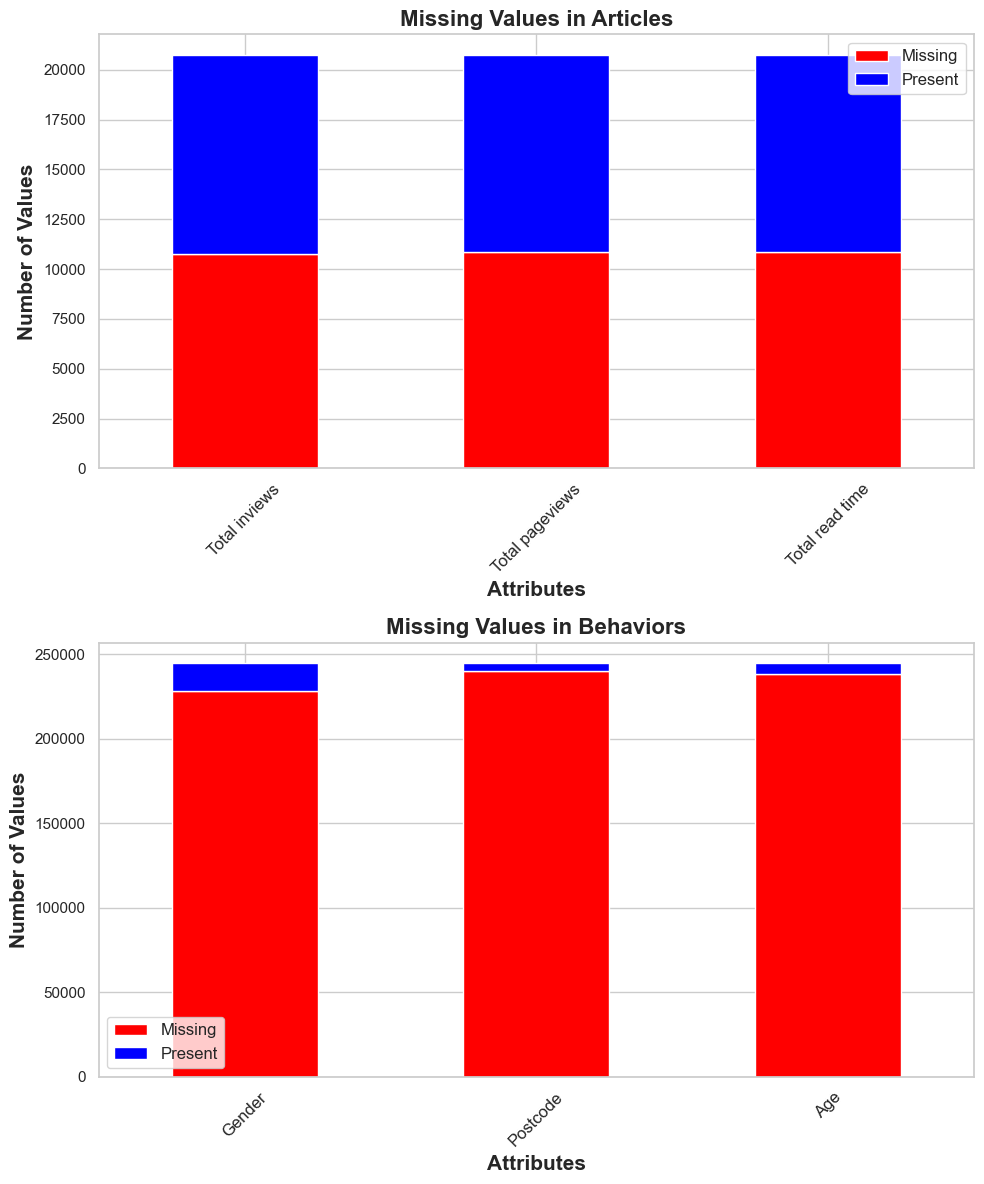

In [117]:
# Capitalize the first letter of each category and replace "_" with " "
articles_data.index = articles_data.index.str.replace('_', ' ').str.capitalize()
behaviors_data.index = behaviors_data.index.str.replace('_', ' ').str.capitalize()

# Plotting both DataFrames in one plot
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot for articles_data
articles_data.plot(kind='bar', stacked=True, color=['red', 'blue'], ax=ax1)
ax1.set_title('Missing Values in Articles', fontsize=16, fontweight='bold')
ax1.set_xlabel('Attributes', fontsize=15, fontweight='bold')
ax1.set_ylabel('Number of Values', fontsize=15, fontweight='bold')
ax1.set_xticklabels(articles_data.index, rotation=45, fontsize=12)
ax1.legend(['Missing', 'Present'], fontsize=12)

# Plot for behaviors_data
behaviors_data.plot(kind='bar', stacked=True, color=['red', 'blue'], ax=ax2)
ax2.set_title('Missing Values in Behaviors', fontsize=16, fontweight='bold')
ax2.set_xlabel('Attributes', fontsize=15, fontweight='bold')
ax2.set_ylabel('Number of Values', fontsize=15, fontweight='bold')
ax2.set_xticklabels(behaviors_data.index, rotation=45, fontsize=12)
ax2.legend(['Missing', 'Present'], fontsize=12)

plt.tight_layout()
plt.show()